# Classifying Readmissions using Diabetes Data (Diabetes 130-US Hospitals)

Sebu Eisaian - 55033063

Jimmy Jin - 90792801

Jay Phil Yoo - 62053128

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.impute import SimpleImputer

First, we import the libraries to process and manipulate data (arrays/dataframes), as well as a plotting library for visualization purposes.
1) Numpy
2) Pandas
3) MatPlotLib

Secondly, we complete all of the imports neccesary to create three models
1) MLP Classifier -> Feed Forward Neural Network
2) LogisticRegression 
3) K Nearest Neigbors 

Lastly, we import test/train split, various metrics, processing, classification, and scoring methods from sklearn.

In [38]:
data = pd.read_csv('diabetic_data.csv')

In the cells above we import the diabetic_data csv file from our notebook directory alongisde the IDs: mapping of some of the values contained in the data, integers that are linked to descriptions of hospital admission type. The first 10 values of the 2 column pandas dataframe is shown in the cell below. 

In [15]:
id_mapping.head(10)

,admission_type_id,description
0,1,Emergency
1,2,Urgent
2,3,Elective
3,4,Newborn
4,5,Not Available
5,6,NaN
6,7,Trauma Center
7,8,Not Mapped
8,NaN,NaN
9,discharge_disposition_id,description


In [16]:
print(data.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


For our classification algorithms to work better, it's important to recognize columns that contain values that are not numerical, so we can process them, converting them into numerical values. 

In [18]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print(non_numeric_columns)
print(len(non_numeric_columns))

Index(['race', 'gender', 'age', 'weight', 'payer_code', 'medical_specialty',
       'diag_1', 'diag_2', 'diag_3', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')
37


In [24]:
# Count the number of null values in each column
null_counts = data.isnull().sum()

# Get the names of columns with null values
columns_with_null = null_counts[null_counts > 0].index.tolist()

# Check for NaN values in each column
nan_counts = data.isna().sum()

# Get the names of columns with NaN values
columns_with_nan = nan_counts[nan_counts > 0].index.tolist()

# Combine the columns with null and NaN values
columns_with_missing = list(set(columns_with_null + columns_with_nan))

# Print the column names
print("Columns with missing values:")
for column in columns_with_missing:
    print(column)

Columns with missing values:
max_glu_serum
A1Cresult


You'll notice that 37 of the 50 columns of our data contain non-numeric values and there are two columns with missing values, so to begin with we'll first convert all of our data to numerical values using SimpleInputer and LabelEncoder.

In [105]:
X = pd.read_csv('diabetic_data.csv')

In [106]:
X.shape

(101766, 50)

In [107]:
X.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [108]:
y = X['readmitted']
X.drop(['readmitted'], axis = 1, inplace = True)

# get drop list with columns consisted with 80% or more of same values. Mostly null values.
drop_list = []
for col in X.columns:
    X[col].replace('?', None, inplace = True)
    X[col].replace('No', 0, inplace = True)
    X[col].replace('None', 0, inplace = True)
    
    val_counts = X[col].value_counts()
    if val_counts.iloc[0] / val_counts.sum() > 0.8:
        drop_list.append(col)

for elem in drop_list:
    X.drop([elem], axis = 1, inplace = True)
    
#23!

In [109]:
#prepare y with int values
y.replace('>30', 2, inplace = True)
y.replace('<30', 1, inplace = True)
y.replace('NO', 0, inplace = True)

#prepare age column by converting object to int values
for val in list(set(X['age'].values)):
    X['age'].replace(val, val[-3:-1], inplace = True)

X['age'].replace('00', 100, inplace = True)

for val in list(set(X['age'].values)):
    X['age'].replace(val, int(val), inplace = True)

#prepare insulin column converting objects to int
X['insulin'].replace('Down', -1, inplace = True)
X['insulin'].replace('No', 0, inplace = True)
X['insulin'].replace('Steady', 1, inplace = True)
X['insulin'].replace('Up', 2, inplace = True)

#prepare change column converting objects to int
X['change'].replace('Ch', 1, inplace = True)
X['change'].replace('No', 0, inplace = True)

#prepare diabetesMed column
X['diabetesMed'].replace('No', 0, inplace = True)
X['diabetesMed'].replace('Yes', 1, inplace = True)

for val in list(set(X['diag_1'].values)):
    if val != None and val[0].isalpha():
        X['diag_1'].replace(val, None, inplace = True)
    elif val ==None:
        pass
    else:
        X['diag_1'].replace(val, float(val), inplace = True)

for val in list(set(X['diag_2'].values)):
    if val != None and val[0].isalpha():
        X['diag_2'].replace(val, None, inplace = True)
    elif val ==None:
        pass
    else:
        X['diag_2'].replace(val, float(val), inplace = True)

for val in list(set(X['diag_3'].values)):
    if val != None and val[0].isalpha():
        X['diag_3'].replace(val, None, inplace = True)
    elif val ==None:
        pass
    else:
        X['diag_3'].replace(val, float(val), inplace = True)

In [110]:
le = LabelEncoder()
for col in X.columns:
    if X.dtypes[col] == object:
        X[col] = le.fit_transform(X[col])

In [111]:
X.fillna(X.mean(), inplace=True)

In [79]:
X.shape

(101766, 25)

In [121]:
X.dtypes

encounter_id                  int64
patient_nbr                   int64
race                          int64
gender                        int64
age                           int64
weight                        int64
admission_type_id             int64
discharge_disposition_id      int64
admission_source_id           int64
time_in_hospital              int64
payer_code                    int64
medical_specialty             int64
num_lab_procedures            int64
num_procedures                int64
num_medications               int64
number_inpatient              int64
diag_1                      float64
diag_2                      float64
diag_3                      float64
number_diagnoses              int64
max_glu_serum                 int64
A1Cresult                     int64
insulin                       int64
change                        int64
diabetesMed                   int64
dtype: object

In [122]:
X.drop(['encounter_id','patient_nbr','payer_code'], axis = 1, inplace = True)

In [123]:
X

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,...,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,insulin,change,diabetesMed
0,2,0,10,9,6,25,1,1,37,41,...,0,250.83,438.674883,418.179285,1,3,3,0,0,0
1,2,0,20,9,1,1,7,3,72,59,...,0,276.00,250.010000,255.000000,9,3,3,2,1,1
2,0,0,30,9,1,1,7,2,72,11,...,1,648.00,250.000000,418.179285,6,3,3,0,0,1
3,2,1,40,9,1,1,7,2,72,44,...,0,8.00,250.430000,403.000000,7,3,3,2,1,1
4,2,1,50,9,1,1,7,1,72,51,...,0,197.00,157.000000,250.000000,5,3,3,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,0,1,80,9,1,3,7,3,72,51,...,0,250.13,291.000000,458.000000,9,3,1,-1,1,1
101762,0,0,90,9,1,4,5,5,72,33,...,1,560.00,276.000000,787.000000,9,3,3,1,0,1
101763,2,1,80,9,1,1,7,1,72,53,...,0,38.00,590.000000,296.000000,13,3,3,-1,1,1
101764,2,0,90,9,2,3,7,10,62,45,...,1,996.00,285.000000,998.000000,9,3,3,2,1,1


In [96]:
#y contains labels
#X contains data

prepare_inputs(X_train,X_test)

Train test split 75:25

In [112]:
X_tr, X_te, y_tr, y_te = train_test_split(X,y,test_size = 0.25)

In [98]:
X_tr.shape

(76324, 25)

In [99]:
y_tr.shape

(76324,)

Of these 37 here are two examples of how data processing was handled.

race: Caucasian, Asian, African American, Hispanic, and other [0,1,2,3,4] if "?" of "nAn" or "Null" we set to the AVG

gender: male, female, unkown [0,1,2] if "?" or "nAn" or "Null" we set to the AVG

The encounter_id, patient_nbr are completely irrelevant to classifying the data. So we'll immediately drop those two columns out of the dataset. The 'payer_code' column has to do with what type of payment was issued for treatment. 

Above we print all of the data columns to become more familiar with the data as it's difficult to do so by printing the entire dataframe.

At this point, we want to create test and training splits, and also create a preprocessed training set to train smaller models that may classify more accurately.

Now we want to identify what label we want to predict! What are the y-labels on this data set? Looking through the official feature description found at the following url:  https://archive-beta.ics.uci.edu/dataset/296/diabetes+130+us+hospitals+for+years+1999+2008, the readmitted feature of the dataset is the label, or more specifically "days to inpatient readmission" It contains 3 values, >30, <30, and NO. 

# Exploration of dataset processing for more accurate modeling:

If we dropped all null values from the feature vector we go from above 100,000 rows of data to only 298, over a 99% reduction in data

In [53]:
x_inputs_no_null = x_inputs.dropna()

In [54]:
x_inputs_no_null

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
162,2521974,80499960,Caucasian,Male,[80-90),?,6,3,7,5,...,No,No,No,No,No,No,No,No,No,No
192,2595612,89193870,Caucasian,Female,[40-50),?,6,1,7,2,...,No,No,No,No,No,No,No,No,No,No
460,4084524,76959585,AfricanAmerican,Female,[70-80),?,6,1,7,10,...,No,No,Up,No,No,No,No,No,Ch,Yes
593,4804968,114960726,Caucasian,Female,[50-60),?,6,1,7,2,...,No,No,Steady,No,No,No,No,No,No,Yes
696,5319174,87847776,Other,Male,[70-80),?,6,6,7,11,...,No,No,No,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100386,424989572,103832127,Caucasian,Male,[60-70),?,2,1,1,6,...,No,No,No,No,No,No,No,No,No,Yes
100493,426670736,101755908,Caucasian,Female,[40-50),?,1,1,7,3,...,No,No,No,No,No,No,No,No,No,No
100578,427875206,90285327,Caucasian,Female,[60-70),?,1,2,7,4,...,No,No,No,No,No,No,No,No,No,No
101029,433822712,104106645,Caucasian,Male,[50-60),?,1,1,7,7,...,No,No,No,No,No,No,No,No,Ch,Yes


The diabetes dataset has missing values, indicated by "?" in the data file (not by "1" as the documentation page incorrectly indicates): you will need to figure out how to handle missing values, e.g., remove rows or remove columns with missing values, replace missing values with default values (e.g., mean or median for the column), or handle missing values directly in your classifier (decision trees can do this for example). You could also (optionally) compare the effect on classifier accuracy of different approaches for handling missing values.

In [ ]:
seed = 1234

# Gradient Boosted Decision Tree

In [131]:
ensemble_model = GradientBoostingClassifier(max_depth=4, n_estimators = 400)
ensemble_model.fit(X_tr, y_tr)

y_tr_pred = ensemble_model.predict(X_tr)
training_error = 1 - accuracy_score(y_tr, y_tr_pred)

y_te_pred = ensemble_model.predict(X_te)
testing_error = 1 - accuracy_score(y_te, y_te_pred)
print("Gradient Boost Classifier with manually filtered dataset ")
print(f"Training Set Error: {training_error:.4f}")
print(f"Testing Set Error: {testing_error:.4f}")

Gradient Boost Classifier with manually filtered dataset 
Training Set Error: 0.3460
Testing Set Error: 0.3870


# Logistic Regression Classifier and MLP Classifier

In [132]:
# Perform standardization on the input features
scaler = StandardScaler()
X_tr = scaler.fit_transform(X_tr)
X_te = scaler.transform(X_te)

# Train MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(1024,), activation='relu', solver='sgd', learning_rate_init=0.001, batch_size=256,alpha = 0.5)
mlp.fit(X_tr, y_tr)

# Calculate MLP training and test errors
mlp_tr_error = 1 - mlp.score(X_tr, y_tr)
mlp_te_error = 1 - mlp.score(X_te, y_te)

# Train logistic regression classifier
logreg = LogisticRegression()
logreg.fit(X_tr, y_tr)

# Calculate logistic regression training and test errors
lreg_tr_error = 1 - logreg.score(X_tr, y_tr)
lreg_te_error = 1 - logreg.score(X_te, y_te)

# Print the errors
print("MLP Training Error:", mlp_tr_error)
print("MLP Test Error:", mlp_te_error)
print("Logistic Regression Training Error:", lreg_tr_error)
print("Logistic Regression Test Error:", lreg_te_error)


MLP Training Error: 0.3981709554006604
MLP Test Error: 0.40602153918717077
Logistic Regression Training Error: 0.4259996855510717
Logistic Regression Test Error: 0.42311925163116104


In [133]:
# Train MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(1024,), activation='relu', solver='adam', learning_rate_init=0.001, batch_size=256,alpha = 0.5)
mlp.fit(X_tr, y_tr)

# Calculate MLP training and test errors
mlp_tr_error = 1 - mlp.score(X_tr, y_tr)
mlp_te_error = 1 - mlp.score(X_te, y_te)

# Train logistic regression classifier
logreg = LogisticRegression(solver='liblinear',C=1.5, max_iter=1000)
logreg.fit(X_tr, y_tr)

# Calculate logistic regression training and test errors
lreg_tr_error = 1 - logreg.score(X_tr, y_tr)
lreg_te_error = 1 - logreg.score(X_te, y_te)

# Print the errors
print("MLP Training Error:", mlp_tr_error)
print("MLP Test Error:", mlp_te_error)
print("Logistic Regression Training Error:", lreg_tr_error)
print("Logistic Regression Test Error:", lreg_te_error)

MLP Training Error: 0.39756826162150827
MLP Test Error: 0.4033880984199355
Logistic Regression Training Error: 0.4271133588386353
Logistic Regression Test Error: 0.42386604826664576


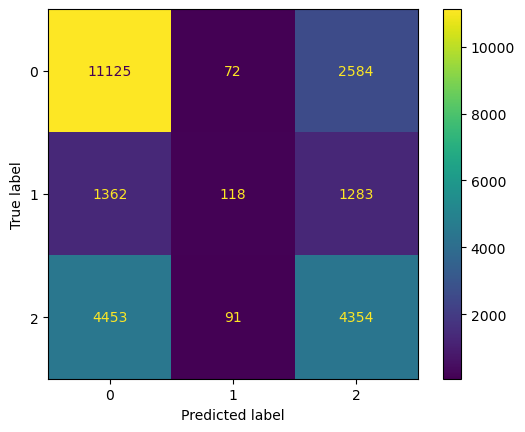

In [134]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
def compute_confusion_matrix(y, y_pred):
    conf_matrix = np.zeros((3,3))
    for i in range(len(y)):
        pred = y_pred[i]
        actual = y[i]
        conf_matrix[actual][pred] += 1
    return conf_matrix

#prepare y with int values
y_te_matrix = y_te
y_te_matrix.replace( 2, '>30', inplace = True)
y_te_matrix.replace(1, '<30', inplace = True)
y_te_matrix.replace(0,'NO', inplace = True)


y_te_pred_matrix = pd.DataFrame(y_te_pred)
y_te_pred_matrix.replace( 2, '>30', inplace = True)
y_te_pred_matrix.replace(1, '<30', inplace = True)
y_te_pred_matrix.replace(0,'NO', inplace = True)

sklearn_cm = confusion_matrix(y_te_matrix, y_te_pred_matrix, labels = ['NO', '<30', '>30'])
sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)
sklearn_disp.plot();
